<a href="https://colab.research.google.com/github/joosk3R/jskRprac/blob/main/alexnet_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
from google.colab import drive
drive.mount('alexnet')

Drive already mounted at alexnet; to attempt to forcibly remount, call drive.mount("alexnet", force_remount=True).


In [3]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

In [4]:
# loding training dataset
from torchvision import datasets
import torchvision.transforms as transforms
import os

In [5]:
path2data = "/data"
if not os.path.exists(path2data):
  os.mkdir(path2data)

In [6]:
data_transformer = transforms.Compose([transforms.ToTensor()])
train_ds= datasets.STL10(path2data, split='train',download=True, transform = data_transformer)


Files already downloaded and verified


In [7]:
print(train_ds.data.shape)

(5000, 3, 96, 96)


In [8]:
train_ds[1]

(tensor([[[0.5059, 0.4863, 0.5412,  ..., 0.5490, 0.5490, 0.5608],
          [0.5176, 0.4863, 0.5020,  ..., 0.5686, 0.5647, 0.5882],
          [0.5176, 0.5020, 0.5059,  ..., 0.5882, 0.5804, 0.5843],
          ...,
          [0.6863, 0.4392, 0.5176,  ..., 0.7686, 0.6510, 0.5412],
          [0.5804, 0.4510, 0.3843,  ..., 0.6157, 0.5020, 0.6980],
          [0.5686, 0.6314, 0.5647,  ..., 0.5725, 0.5922, 0.7608]],
 
         [[0.5490, 0.5216, 0.5647,  ..., 0.5451, 0.5451, 0.5451],
          [0.5608, 0.5216, 0.5373,  ..., 0.5490, 0.5529, 0.5804],
          [0.5569, 0.5412, 0.5451,  ..., 0.5765, 0.5804, 0.5765],
          ...,
          [0.6353, 0.4314, 0.4627,  ..., 0.6941, 0.5725, 0.4745],
          [0.4941, 0.4235, 0.3412,  ..., 0.5373, 0.4275, 0.5765],
          [0.4706, 0.5608, 0.5176,  ..., 0.5020, 0.5098, 0.6431]],
 
         [[0.2863, 0.2667, 0.3294,  ..., 0.3294, 0.3137, 0.3294],
          [0.3098, 0.2784, 0.3059,  ..., 0.3569, 0.3373, 0.3686],
          [0.3176, 0.3020, 0.3059,  ...,

In [9]:
test0_ds = datasets.STL10(path2data, split= 'test', download = True, transform = data_transformer)
print(test0_ds.data.shape)

Files already downloaded and verified
(8000, 3, 96, 96)


In [10]:
import numpy as np

meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in train_ds]
stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in train_ds]


meanR = np.mean([m[0] for m in meanRGB])
meanG = np.mean([m[1] for m in meanRGB])
meanB = np.mean([m[2] for m in meanRGB])

stdR = np.mean([s[0] for s in stdRGB])
stdG = np.mean([s[1] for s in stdRGB])
stdB = np.mean([s[2] for s in stdRGB])

In [11]:
print(meanR, meanG, meanB)
print(stdR, stdG, stdB)

0.4467106 0.43980986 0.40664646
0.22414584 0.22148906 0.22389975


In [12]:
train_transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([meanR,meanG,meanB],[stdR,stdG,stdB]),
    transforms.Resize(227)
])

test_transformer = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([meanR, meanG, meanB], [stdR, stdG, stdB]),
                transforms.Resize(227)
])



In [13]:
train_ds.transform = train_transformer
test0_ds.transform = test_transformer

In [14]:
img, _ = train_ds[1]
print(img.shape)

torch.Size([3, 227, 227])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [15]:
import torch
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

2732
images indices:  2732


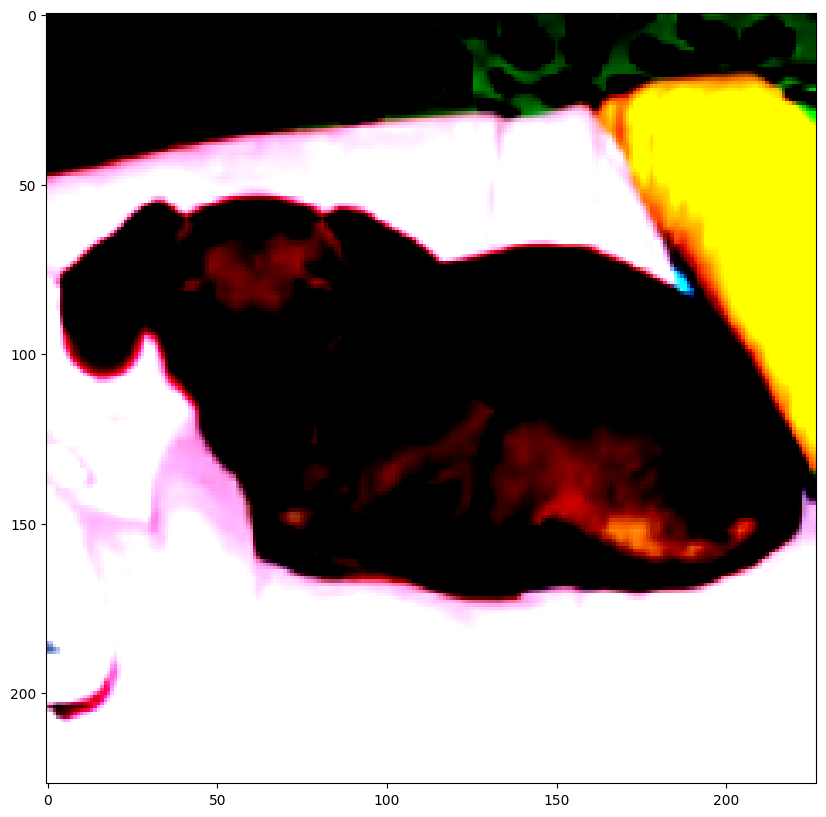

In [16]:
def show(img, y=None, color=True):

  npimg = img.numpy()
  npimg_tr = np.transpose(npimg, (1,2,0))
  plt.imshow(npimg_tr)

  if y is not None:
    plt.title("labels: "+ str(y))

np.random.seed(0)
torch.manual_seed(0)

rnd_inds = int(np.random.randint(0,len(train_ds),1))
print(rnd_inds)
img, label = train_ds[rnd_inds]
print('images indices: ' , rnd_inds)

plt.figure(figsize =(10,10))
show(img)

In [17]:
import collections
y_train = [y for _,y in train_ds]
counter_train = collections.Counter(y_train)
print(counter_train)

Counter({1: 500, 5: 500, 6: 500, 3: 500, 9: 500, 7: 500, 4: 500, 8: 500, 0: 500, 2: 500})


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits =1 , test_size = 0.2 , random_state = 0)

indices =list(range(len(test0_ds)))
y_test0 = [y for _,y in test0_ds]

for test_index, val_index in sss.split(indices, y_test0):
  print('test : ', len(test_index), 'val : ',len(val_index))


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


test :  6400 val :  1600


In [19]:
# create two datasets from test0_ds
from torch.utils.data import Subset

# if test0_ds is updated, val_ds and test_ds are updated
# because val_ds and test_ds are a subset of test0_ds
val_ds = Subset(test0_ds, val_index)
test_ds = Subset(test0_ds, test_index)

In [20]:
# count the number of images per calss in val_ds and test_ds
import collections
import numpy as np

y_test = [y for _, y in test_ds]
y_val = [y for _, y in val_ds]

counter_test = collections.Counter(y_test)
counter_val = collections.Counter(y_val)
print(counter_test)
print(counter_val)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Counter({6: 640, 0: 640, 4: 640, 5: 640, 9: 640, 2: 640, 3: 640, 1: 640, 7: 640, 8: 640})
Counter({2: 160, 8: 160, 3: 160, 6: 160, 4: 160, 1: 160, 5: 160, 9: 160, 0: 160, 7: 160})


In [22]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size = 32 , shuffle = True)
val_dl = DataLoader(val_ds, batch_size = 32 , shuffle = True)

for x,y in train_dl:
  print(x.shape)
  print(y.shape)
  break

for x,y in val_dl:
  print(x.shape)
  print(y.shape)
  break


torch.Size([32, 3, 227, 227])
torch.Size([32])
torch.Size([32, 3, 227, 227])
torch.Size([32])


In [40]:
# define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [38]:
import torch.nn as nn
import torch.nn.functional as F

class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet,self).__init__()
        # input size : (b x 3 x 227 x 227)
        # 논문에는 image 크기가 224 pixel이라고 나와 있지만, 오타입니다.
        # 227x227을 사용합니다.

        # Conv layer
        self.net = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0), # (b x 96 x 55 x 55)
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2), # (b x 96 x 27 x 27)

            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2), # (b x 256 x 27 x 27)
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2), # (b x 256 x 13 x 13)

            nn.Conv2d(256, 384, 3, 1, 1), # (b x 384 x 13 x 13)
            nn.ReLU(),

            nn.Conv2d(384, 384, 3, 1, 1), # (b x 384 x 13 x 13)
            nn.ReLU(),

            nn.Conv2d(384, 256, 3, 1, 1), # (b x 256 x 13 x 13)
            nn.ReLU(),
            nn.MaxPool2d(3, 2), # (b x 256 x 6 x 6)
        )

        # fc layer
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5, inplace=True),
            nn.Linear(in_features=(256 * 6 * 6), out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5, inplace=True),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=num_classes),
        )

        # weight initialization
        self.init_weight()

    # define weight initialization function
    def init_weight(self):
        for layer in self.net:
            if isinstance(layer, nn.Conv2d):
                nn.init.normal_(layer.weight, mean=0, std=0.01)
                nn.init.constant_(layer.bias, 0)
        # in paper, initialize bias to 1 for conv2, 4, 5 layer
        nn.init.constant_(self.net[4].bias, 1)
        nn.init.constant_(self.net[10].bias, 1)
        nn.init.constant_(self.net[12].bias, 1)

    def forward(self,x):
        x = self.net(x)
        x = x.view(-1, 256 * 6* 6)
        x = self.classifier(x)
        return x


In [41]:
# check the model
model = AlexNet().to(device)
print(model)


AlexNet(
  (net): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=True)
    (1): Linear(in_features=9216, out_features=4096, bias=True)


In [42]:

# get the model summary
from torchsummary import summary
summary(model, input_size=(3, 227, 227), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
 LocalResponseNorm-3           [-1, 96, 55, 55]               0
         MaxPool2d-4           [-1, 96, 27, 27]               0
            Conv2d-5          [-1, 256, 27, 27]         614,656
              ReLU-6          [-1, 256, 27, 27]               0
 LocalResponseNorm-7          [-1, 256, 27, 27]               0
         MaxPool2d-8          [-1, 256, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]         885,120
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 384, 13, 13]       1,327,488
             ReLU-12          [-1, 384, 13, 13]               0
           Conv2d-13          [-1, 256, 13, 13]         884,992
             ReLU-14          [-1, 256,

In [ ]:

# check weight initialization
for p in model.parameters():
    print(p)
    break


In [56]:
loss_func = nn.CrossEntropyLoss(reduction ='sum')
from torch import optim
# opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
opt = optim.Adam(model.parameters(), lr =0.01)


# read the current value of the learning rate using the following function
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

from torch.optim.lr_scheduler import StepLR # define lr_scheduler : 1/10 per 10 epochs
lr_scheduler = optim.lr_scheduler.StepLR(opt, step_size=30, gamma=0.1)

In [61]:
def metrics_batch(output, target):
  pred = output.argmax(dim=1 , keepdim= True)
  corrects = pred.eq(target.view_as(pred)).sum().item()
  return corrects

In [51]:
# define a function to compute the loss value per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)

    metric_b = metrics_batch(output, target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b

In [52]:

# develop a function to compute the loss value and the performance metric for the epoch
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0
    running_metric = 0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # move batcch to device
        xb = xb.to(device)
        yb = yb.to(device)
        # get model output
        output = model(xb)

        # get loss per batch
        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        # update running loss
        running_loss += loss_b
        # update running metric
        if metric_b is not None:
            running_metric += metric_b

        # break the loop in case of sanity check
        if sanity_check is True:
            break

    # average loss value and metric value
    loss = running_loss / float(len_data)
    metric = running_metric / float(len_data)
    return loss, metric


In [53]:
import time
import copy

# develop train_val function
def train_val(model, params):
    # extract model parameters
    num_epochs = params['num_epochs']
    loss_func = params['loss_func']
    opt = params['optimizer']
    train_dl = params['train_dl']
    val_dl = params['val_dl']
    sanity_check = params['sanity_check']
    lr_scheduler = params['lr_scheduler']
    path2weights = params['path2weights']

    # keep a history of the loss and the metric value
    loss_history = {
        'train': [],
        'val': [],
    }

    metric_history = {
        'train': [],
        'val': [],
    }

    # save the best perfirming model
    best_model_wts = copy.deepcopy(model.state_dict())

    # initializer the best loss to an infinite value
    best_loss = float('inf')

    for epoch in range(num_epochs):
        start_time = time.time()

        # get current learning rate
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))

        # train model on trainin dataset
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)

        # collect loss and metric for the training dataset
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        # evaluate model on validation dataset
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)

        # store the best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            # store weights into a local file
            torch.save(model.state_dict(), path2weights)
            print('Copied best model weights')

        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)

        # update the learning rate
        lr_scheduler.step()
        if current_lr != get_lr(opt):
            print('Loading best model weights!')
            model.load_state_dict(best_model_wts)

        # print the loss and accuracy values and return the trained model
        print('train loss: %.6f, dev loss: %.6f, accuracy: %.2f, time: %.4f s' %(train_loss, val_loss, 100*val_metric, time.time()-start_time))
        print('-'*10)

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history


In [63]:
# define the training parameters
params_train = {
    'num_epochs':3,
    'optimizer':opt,
    'loss_func':loss_func,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'./models/weights.pt',
}

# check the directory to save weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

In [64]:
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/2, current lr=0.01


RuntimeError: ignored

In [65]:
# define the loss function
loss_func = nn.CrossEntropyLoss(reduction='sum')


# define the optimizer
from torch import optim
# opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
opt = optim.Adam(model.parameters(), lr=0.01)


# read the current value of the learning rate using the following function
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']


# define lr_scheduler : 1/10 per 10 epochs
from torch.optim.lr_scheduler import StepLR
lr_scheduler = optim.lr_scheduler.StepLR(opt, step_size=30, gamma=0.1)


# define a function to count the number of correct predictions per mini-batch
def metrics_batch(output, target):
    # get output class
    pred = output.argmax(dim=1, keepdim=True)
    # compare output class with target class
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects


# define a function to compute the loss value per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)

    metric_b = metrics_batch(output, target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b


# develop a function to compute the loss value and the performance metric for the epoch
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0
    running_metric = 0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # move batcch to device
        xb = xb.to(device)
        yb = yb.to(device)
        # get model output
        output = model(xb)

        # get loss per batch
        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        # update running loss
        running_loss += loss_b
        # update running metric
        if metric_b is not None:
            running_metric += metric_b

        # break the loop in case of sanity check
        if sanity_check is True:
            break

    # average loss value and metric value
    loss = running_loss / float(len_data)
    metric = running_metric / float(len_data)
    return loss, metric


import time
import copy

# develop train_val function
def train_val(model, params):
    # extract model parameters
    num_epochs = params['num_epochs']
    loss_func = params['loss_func']
    opt = params['optimizer']
    train_dl = params['train_dl']
    val_dl = params['val_dl']
    sanity_check = params['sanity_check']
    lr_scheduler = params['lr_scheduler']
    path2weights = params['path2weights']

    # keep a history of the loss and the metric value
    loss_history = {
        'train': [],
        'val': [],
    }

    metric_history = {
        'train': [],
        'val': [],
    }

    # save the best perfirming model
    best_model_wts = copy.deepcopy(model.state_dict())

    # initializer the best loss to an infinite value
    best_loss = float('inf')

    for epoch in range(num_epochs):
        start_time = time.time()

        # get current learning rate
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))

        # train model on trainin dataset
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)

        # collect loss and metric for the training dataset
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        # evaluate model on validation dataset
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)

        # store the best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            # store weights into a local file
            torch.save(model.state_dict(), path2weights)
            print('Copied best model weights')

        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)

        # update the learning rate
        lr_scheduler.step()
        if current_lr != get_lr(opt):
            print('Loading best model weights!')
            model.load_state_dict(best_model_wts)

        # print the loss and accuracy values and return the trained model
        print('train loss: %.6f, dev loss: %.6f, accuracy: %.2f, time: %.4f s' %(train_loss, val_loss, 100*val_metric, time.time()-start_time))
        print('-'*10)

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history


# define the training parameters
params_train = {
    'num_epochs':3,
    'optimizer':opt,
    'loss_func':loss_func,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'./models/weights.pt',
}

# check the directory to save weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')


In [68]:
 #train model
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/2, current lr=0.01


RuntimeError: ignored

왜 안되는지 모르곘넹...

In [81]:

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [71]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device   # cuda 지정

device(type='cuda')

In [72]:
 #논문 5. Details of learning 참고 parameter
batch_size = 128
momentum = 0.9
lr_decay = 0.0005
lr_init = 0.01
image_dim = 227    # pixels
num_classes = 1000   # 1000개의 class 지정
device_ids = [0, 1, 2, 3]

In [82]:
class AlexNet(nn.Module):

  def __init__(self, num_classes=1000):
    super().__init__()

    ##### CNN layers
    self.net = nn.Sequential(
        # conv1
        nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
        nn.ReLU(inplace=True),  # non-saturating function
        nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),  # 논문의 LRN 파라미터 그대로 지정
        nn.MaxPool2d(kernel_size=3, stride=2),
        # conv2
        nn.Conv2d(96, 256, kernel_size=5, padding=2),
        nn.ReLU(),
        nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
        nn.MaxPool2d(kernel_size=3, stride=2),
        # conv3
        nn.Conv2d(256, 384, 3, padding=1),
        nn.ReLU(),
        # conv4
        nn.Conv2d(384, 384, 3, padding=1),
        nn.ReLU(),
        # conv5
        nn.Conv2d(384, 256, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),

    )

    ##### FC layers
    self.classifier = nn.Sequential(
        # fc1
        nn.Dropout(p=0.5, inplace=True),
        nn.Linear(in_features=(256 * 6 * 6), out_features=4096),
        nn.ReLU(inplace=True).
        # fc2
        nn.Dropout(p=0.5, inplace=True),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, num_classes),
    )

    # bias, weight 초기화
    def init_bias_weights(self):
      for layer in self.net:
        if isinstance(layer, nn.Conv2d):
          nn.init.normal_(layer.weight, mean=0, std=0.01)   # weight 초기화
          nn.init.constant_(layer.bias, 0)   # bias 초기화

      # conv 2, 4, 5는 bias 1로 초기화
      nn.init.constant_(self.net[4].bias, 1)
      nn.init.constant_(self.net[10].bias, 1)
      nn.init.constant_(self.net[12].bias, 1)

    # modeling
    def forward(self, x):
      x = self.net(x)   # conv
      x = x.view(-1, 256*6*6)   # keras의 reshape (텐서 크기 2d 변경)
      return self.classifier(x)   # fc

In [83]:
if __name__== '__main__':
  seed = torch.initial_seed()  # seed value 설정
  model = AlexNet(num_classes=num_classes).to(device)
  model = torch.nn.parallel.DataParallel(model, divice_ids=device_ids)  # 모델 설정
  print(model)

  # dataset, data loader 설정
  dataset = datasets.ImageFolder(TRAIN_IMG_DIR, transforms.Compose([
      transforms.CenterCrop(IMAGE_DIM),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ]))

  dataloader = data.DataLoader(
      dataset,
      shuffle=True,
      pin_memory=True,
      num_workers=8,
      drop_last=True,
      batch_size=batch_size)

  # optimizer
  optimizer = optim.SGD(
      params = model.parameters(),
      lr = lr_init,
      momentum = momentum,
      weight_decay = lr_decay  # lr 점점 감소
  )

  lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)   # lr 점점 감소

  # training
  total_steps=1
  for epoch in range(num_epochs):
    lr_scheduler.step()

    for imgs, classes in dataloader:
      imgs, classes = imgs.to(device), classes.to(device)

      output = alexnet(imgs)
      loss = F.cross_entropy(output, classes)  # loss 계산

      optimizer.zero_grad()
      loss.backward()  # backpropa
      optimizer.step()  # parameter update

AttributeError: ignored

In [ ]:
pip install tensorboardcolab   # tensorboard 설치


재도전

In [89]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import transforms


class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=96, kernel_size=11, stride=4)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1) # conv5와 fc1 사이에 view 들어간다.
        self.fc1 = nn.Linear(in_features=256 * 6 * 6, out_features=4096) # fc layer
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc3 = nn.Linear(in_features=4096, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=3, stride=2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=3, stride=2)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x, kernel_size=3, stride=2)

        x = x.view(x.size(0), -1) # 4차원을 1차원으로 펼쳐주는 층 (역할) -> flatten

        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5)

        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.5)

        x = F.log_softmax(self.fc3(x), dim=1)

        return x

    @staticmethod
    def transform():
        return transforms.Compose([transforms.Resize((227, 227)),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=(0.1307,), std=(0.3081,))])
if __name__ == "__main__":
    # if gpu is to be used
    use_cuda = torch.cuda.is_available()
    print("use_cuda : ", use_cuda)

    FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
    device= torch.device("cuda:0" if use_cuda else "cpu")

    net = AlexNet().to(device)

    X = torch.randn(size=(1, 1, 227, 227)).type(FloatTensor)
    print(net(X))
    print(summary(net, (1, 227, 227)))

use_cuda :  True
tensor([[-2.2898, -2.2880, -2.3073, -2.2927, -2.3028, -2.3245, -2.3268, -2.2984,
         -2.2979, -2.2983]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          11,712
            Conv2d-2          [-1, 256, 27, 27]         614,656
            Conv2d-3          [-1, 384, 13, 13]         885,120
            Conv2d-4          [-1, 384, 13, 13]       1,327,488
            Conv2d-5          [-1, 256, 13, 13]         884,992
            Linear-6                 [-1, 4096]      37,752,832
            Linear-7                 [-1, 4096]      16,781,312
            Linear-8                   [-1, 10]          40,970
Total params: 58,299,082
Trainable params: 58,299,082
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.20
Forward/backward pa

In [90]:
if __name__=="__main__":
    # hyper parameter
    batch_size = 512
    num_epochs = 20
    learning_rate = 0.0001

    # data load
    root = './MNIST_Fashion'
    transform = AlexNet.transform()
    train_set = datasets.FashionMNIST(root=root, train=True, transform=transform, download=True)
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_set = datasets.FashionMNIST(root=root, train=False, transform=transform, download=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)


    # if gpu is to be used
    use_cuda = torch.cuda.is_available()
    print("use_cuda : ", use_cuda)
    device = torch.device("cuda:0" if use_cuda else "cpu")
    model = AlexNet().to(device)
    criterion = F.nll_loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)


    def train(model, device, train_loader, optimizer, epoch):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            target = target.type(torch.LongTensor)
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            if (batch_idx + 1) % 30 == 0:
                print("Train Epoch:{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))

    def test(model, device, test_loader):
        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += criterion(output, target, reduction='sum').item()
                pred = output.max(1, keepdim=True)[1]
                correct += pred.eq(target.view_as(pred)).sum().item()

            test_loss /= len(test_loader.dataset)
            print("\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
                test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))
            print('='*50)

100%|██████████| 26421880/26421880 [00:01<00:00, 15853022.93it/s]


Extracting ./MNIST_Fashion/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_Fashion/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 271073.40it/s]


Extracting ./MNIST_Fashion/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_Fashion/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5064142.62it/s]


Extracting ./MNIST_Fashion/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_Fashion/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20983748.29it/s]


Extracting ./MNIST_Fashion/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_Fashion/FashionMNIST/raw

use_cuda :  True


In [ ]:
for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Train Epoch:1 [14848/60000 (25%)]	Loss: 0.820790
